In [1]:

%%html
<marquee style='width: 30%; color: yellow;'><b>Trading-Prediction-SVM</b></marquee>

In [ ]:
import pandas as pd
import numpy as np
import glob
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Prediction Task#
Use 19 stocks' past 10 days prices to predict 1 Amazon's price behaivor (up or down)

1. Dataset preparation and selection
Load 25 company's price data including amazon, do correlation and drop the 5 most unrelated companies. 

In [ ]:
#Show files of 25 companies stock price history
!ls /content/drive/MyDrive/data/

AAPL.csv  BAC.csv    DIS.csv   JNJ.csv	 NFLX.csv  TSLA.csv  XOM.csv
ADBE.csv  CMCSA.csv  GOOG.csv  JPM.csv	 NKE.csv   UNH.csv
AMZN.csv  COST.csv   HD.csv    KO.csv	 NVDA.csv  VZ.csv
BABA.csv  CVX.csv    INTC.csv  MSFT.csv  TMO.csv   WMT.csv


In [ ]:
# load all 25 company names from file folder
path =r'/content/drive/MyDrive/data/'
file_name = os.listdir(path)
company = [k.replace(".csv",'') for k in file_name] #save the file name to 'company' and drop .csv

In [ ]:
print(company)

['KO', 'VZ', 'NKE', 'WMT', 'INTC', 'CVX', 'NVDA', 'ADBE', 'COST', 'TMO', 'MSFT', 'HD', 'BAC', 'DIS', 'CMCSA', 'XOM', 'UNH', 'JNJ', 'GOOG', 'BABA', 'JPM', 'TSLA', 'NFLX', 'AAPL', 'AMZN']


In [ ]:
#generate dateframes of df_'company' with columns 'Data' and 'Close'
#create a tmp folder under '/content/'
!mkdir /content/tmp/ #create tmp folder to save tmp files
for k in range(len(company)):
  df=pd.read_csv(path+company[k]+'.csv',index_col=None,header=0) #load #i csv file
  df=df[['Date','Close']] #only keep two columns
  df.to_csv('/content/tmp/'+company[k]) #save the df with company name to tmp folder
  exec(f'df_{company[k]}=df') #generate dataframes of df_'company'

In [ ]:
df_name=os.listdir('/content/tmp/')

In [ ]:
#append "close" price of each company to dataframe df_25company
df_25company=pd.DataFrame()
for k in range(len(df_name)):
  df_tmp=pd.read_csv('/content/tmp/'+df_name[k],index_col=None,header=0) # load tmp file to df_tmp
  df_25company[f'{df_name[k]}']=df_tmp.iloc[:,2] #append the 2nd column to df with company name

In [ ]:
df_25company

,ADBE,VZ,NKE,BAC,COST,INTC,DIS,AMZN,XOM,UNH,HD,GOOG,NFLX,MSFT,NVDA,JPM,TSLA,CMCSA,WMT,CVX,AAPL,JNJ,KO,TMO,BABA
0,72.699997,46.779999,48.075001,17.889999,141.750000,36.290001,94.190002,308.519989,92.449997,101.089996,104.970001,524.958740,48.801430,46.450001,5.012500,62.580002,44.481998,29.004999,85.879997,112.180000,27.594999,104.570000,42.220001,125.290001,103.940002
1,72.339996,46.959999,47.514999,17.900000,141.610001,36.360001,93.750000,302.190002,92.830002,100.779999,103.430000,523.373108,49.848572,46.759998,5.032500,62.490002,43.862000,28.674999,85.900002,112.580002,27.332500,104.519997,42.139999,128.119995,103.599998
2,71.980003,46.570000,46.750000,17.379999,140.000000,35.950001,92.379997,295.290009,90.290001,99.120003,101.260002,512.463013,47.311428,46.330002,4.947500,60.549999,42.018002,27.980000,85.650002,108.080002,26.562500,103.790001,42.139999,126.360001,101.000000
3,70.529999,47.040001,46.474998,16.860001,141.850006,35.279999,91.889999,298.420013,89.809998,98.919998,100.949997,500.585632,46.501431,45.650002,4.797500,58.980000,42.256001,27.615000,86.309998,108.029999,26.565001,103.279999,42.459999,125.180000,103.320000
4,71.110001,46.189999,47.435001,16.940001,144.320007,36.020000,92.830002,300.459991,90.720001,99.930000,104.410004,499.727997,46.742859,46.230000,4.785000,59.070000,42.189999,27.590000,88.599998,107.940002,26.937500,105.559998,42.990002,128.929993,102.129997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,208.800003,54.919998,72.370003,23.370001,194.520004,44.840000,104.220001,1343.959961,68.120003,238.339996,160.479996,979.539978,246.389999,98.230003,32.392502,94.169998,63.953999,33.750000,87.129997,104.209999,37.682499,128.089996,47.570000,215.789993,132.000000
1002,205.160004,53.049999,68.099998,22.730000,189.990005,43.590000,100.349998,1470.900024,65.510002,232.940002,158.139999,976.219971,233.880005,94.129997,31.770000,92.139999,59.077999,33.070000,85.820000,100.989998,36.707500,122.839996,45.959999,208.470001,131.889999
1003,222.949997,54.439999,73.010002,24.110001,198.630005,46.189999,105.830002,1461.640015,68.639999,243.350006,168.279999,1039.459961,253.669998,100.559998,33.275002,95.959999,65.218002,34.139999,90.410004,107.389999,39.292500,126.709999,46.939999,217.970001,138.000000
1004,225.139999,55.150002,73.669998,24.370001,201.080002,46.360001,106.519997,1478.020020,68.940002,245.970001,170.320007,1043.880005,255.570007,101.180000,32.792500,97.040001,63.226002,34.470001,91.589996,109.320000,39.037498,127.410004,47.529999,221.089996,138.449997


2. Generate crosscorrelation matrix and sort the column of Amazon to determin which 5 companies have least relationship with Amazon

In [ ]:
# generate crosscorrelation matrix and sort
corrMatrix = df_25company.corr()  # compute corr of the 25companies
corr_AMZN=corrMatrix['AMZN'].abs().sort_values() # sort the best corr with AMZN
corr_AMZN

DIS      0.278543
XOM      0.320728
VZ       0.388655
CMCSA    0.558234
KO       0.603629
TSLA     0.671185
WMT      0.687259
CVX      0.705112
JNJ      0.788424
NKE      0.835543
BABA     0.843333
BAC      0.874236
AAPL     0.893278
INTC     0.900905
JPM      0.919609
COST     0.935096
NVDA     0.937942
GOOG     0.953460
HD       0.957028
TMO      0.965944
UNH      0.966151
NFLX     0.968131
MSFT     0.983439
ADBE     0.986253
AMZN     1.000000
Name: AMZN, dtype: float64

In [ ]:
corr_AMZN.to_excel('/content/drive/MyDrive/corr_AMZN.xlsx')

The 5 companies which has least relationship with Amazon are: DIS,XOM,VZ,CMCSA and KO. They will be droped from dataframe. 

In [ ]:
#drop the 5 companies
df=df_25company.drop(['DIS','XOM','VZ','CMCSA','KO','AMZN'],axis=1)
df['AMZN']=df_25company['AMZN']

In [ ]:
df

,ADBE,NKE,BAC,COST,INTC,UNH,HD,GOOG,NFLX,MSFT,NVDA,JPM,TSLA,WMT,CVX,AAPL,JNJ,TMO,BABA,AMZN
0,72.699997,48.075001,17.889999,141.750000,36.290001,101.089996,104.970001,524.958740,48.801430,46.450001,5.012500,62.580002,44.481998,85.879997,112.180000,27.594999,104.570000,125.290001,103.940002,308.519989
1,72.339996,47.514999,17.900000,141.610001,36.360001,100.779999,103.430000,523.373108,49.848572,46.759998,5.032500,62.490002,43.862000,85.900002,112.580002,27.332500,104.519997,128.119995,103.599998,302.190002
2,71.980003,46.750000,17.379999,140.000000,35.950001,99.120003,101.260002,512.463013,47.311428,46.330002,4.947500,60.549999,42.018002,85.650002,108.080002,26.562500,103.790001,126.360001,101.000000,295.290009
3,70.529999,46.474998,16.860001,141.850006,35.279999,98.919998,100.949997,500.585632,46.501431,45.650002,4.797500,58.980000,42.256001,86.309998,108.029999,26.565001,103.279999,125.180000,103.320000,298.420013
4,71.110001,47.435001,16.940001,144.320007,36.020000,99.930000,104.410004,499.727997,46.742859,46.230000,4.785000,59.070000,42.189999,88.599998,107.940002,26.937500,105.559998,128.929993,102.129997,300.459991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,208.800003,72.370003,23.370001,194.520004,44.840000,238.339996,160.479996,979.539978,246.389999,98.230003,32.392502,94.169998,63.953999,87.129997,104.209999,37.682499,128.089996,215.789993,132.000000,1343.959961
1002,205.160004,68.099998,22.730000,189.990005,43.590000,232.940002,158.139999,976.219971,233.880005,94.129997,31.770000,92.139999,59.077999,85.820000,100.989998,36.707500,122.839996,208.470001,131.889999,1470.900024
1003,222.949997,73.010002,24.110001,198.630005,46.189999,243.350006,168.279999,1039.459961,253.669998,100.559998,33.275002,95.959999,65.218002,90.410004,107.389999,39.292500,126.709999,217.970001,138.000000,1461.640015
1004,225.139999,73.669998,24.370001,201.080002,46.360001,245.970001,170.320007,1043.880005,255.570007,101.180000,32.792500,97.040001,63.226002,91.589996,109.320000,39.037498,127.410004,221.089996,138.449997,1478.020020


#2. & 3. pre-processing and create data and vectrors

In [ ]:
df_ror=df.pct_change()  # compute the rate of return (ror)
df_ror=df_ror.drop(0)*100 # the first row has no ror

In [ ]:
df_ror

,ADBE,NKE,BAC,COST,INTC,UNH,HD,GOOG,NFLX,MSFT,NVDA,JPM,TSLA,WMT,CVX,AAPL,JNJ,TMO,BABA,AMZN
1,-0.495187,-1.164851,0.055903,-0.098765,0.192891,-0.306654,-1.467087,-0.302049,2.145720,0.667378,0.399002,-0.143816,-1.393818,0.023294,0.356572,-0.951256,-0.047818,2.258755,-0.327116,-2.051727
2,-0.497640,-1.610016,-2.905034,-1.136926,-1.127613,-1.647148,-2.098035,-2.084573,-5.089702,-0.919581,-1.689021,-3.104501,-4.204090,-0.291036,-3.997158,-2.817159,-0.698427,-1.373708,-2.509651,-2.283329
3,-2.014454,-0.588240,-2.991933,1.321433,-1.863705,-0.201781,-0.306148,-2.317705,-1.712054,-1.467731,-3.031834,-2.592897,0.566422,0.770573,-0.046265,0.009416,-0.491379,-0.933841,2.297030,1.059976
4,0.822348,2.065633,0.474496,1.741277,2.097509,1.021029,3.427446,-0.171326,0.519184,1.270532,-0.260552,0.152594,-0.156196,2.653227,-0.083307,1.402217,2.207590,2.995681,-1.151764,0.683593
5,2.545348,2.308418,2.066116,0.859195,1.860075,4.773338,2.212429,0.315308,2.218820,2.941813,3.761755,2.234635,-0.156430,2.110613,2.288310,3.842227,0.786284,1.039332,2.839520,-1.174865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,-4.504913,7.167191,-3.069266,-1.324000,-1.537112,-1.691143,-2.241720,-2.959154,-5.445540,-3.231208,-4.093264,-2.363918,1.391970,-0.171863,-0.733477,-3.889564,-0.140335,-1.761819,-2.301829,-2.431304
1002,-1.743295,-5.900242,-2.738558,-2.328809,-2.787690,-2.265668,-1.458124,-0.338935,-5.077314,-4.173884,-1.921747,-2.155675,-7.624230,-1.503497,-3.089916,-2.587405,-4.098681,-3.392183,-0.083334,9.445227
1003,8.671277,7.209991,6.071276,4.547608,5.964669,4.468964,6.412040,6.478047,8.461601,6.830980,4.737180,4.145865,10.393045,5.348408,6.337262,7.042158,3.150442,4.557011,4.632649,-0.629547
1004,0.982284,0.903980,1.078391,1.233448,0.368049,1.076637,1.212270,0.425225,0.749008,0.616549,-1.450043,1.125471,-3.054371,1.305156,1.797189,-0.648984,0.552447,1.431387,0.326085,1.120659


In [ ]:
# re-structure the vectors as required
result_l=list()
for i in range(11,len(df_ror)+1):
    result_l_c = list()
    for column in range(0, len(df_ror.columns)):
#        result_l_c.append(list(result.iloc[i-10:i, column]))
        result_l_c = result_l_c + list(df_ror.iloc[i-10:i, column])
    result_l.append(result_l_c)
df_20_ror=pd.DataFrame(result_l)

Rate of return = percentage change; use rate of reture (ROR) to represent the dataframe

In [ ]:
df_20_ror

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.497640,-2.014454,0.822348,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-1.610016,-0.588240,2.065633,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,-2.905034,-2.991933,0.474496,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-1.136926,1.321433,1.741277,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,...,-0.698427,-0.491379,2.207590,0.786284,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-1.373708,-0.933841,2.995681,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-2.509651,2.297030,-1.151764,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,-2.283329,1.059976,0.683593,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131
1,-2.014454,0.822348,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,-0.588240,2.065633,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-2.991933,0.474496,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,1.321433,1.741277,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,...,-0.491379,2.207590,0.786284,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,-0.933841,2.995681,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,2.297030,-1.151764,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,3.251112,1.059976,0.683593,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131,2.698313
2,0.822348,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,0.069944,2.065633,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-0.106824,0.474496,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,0.982962,1.741277,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,-0.172195,...,2.207590,0.786284,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,0.602232,2.995681,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,0.095818,-1.151764,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,3.251112,3.248700,0.683593,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131,2.698313,4.396975
3,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,0.069944,2.711772,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-0.106824,2.502402,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,0.982962,4.412719,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,-0.172195,1.530836,...,0.786284,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,0.602232,1.825319,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,0.095818,1.308231,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,3.251112,3.248700,0.687384,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131,2.698313,4.396975,0.667056
4,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,0.069944,2.711772,0.789324,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-0.106824,2.502402,0.323428,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,0.982962,4.412719,-2.237415,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,-0.172195,1.530836,0.552133,...,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,0.602232,1.825319,-1.503474,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,0.095818,1.308231,-1.677163,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,

In [ ]:
#if the t day of reture of rate is >=0.6 then reture 1 otherwise reture 0
df_20_ror['y']=(df_20_ror[199]>=0.6).astype(int)

In [ ]:
df_20_ror

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,y
0,-0.497640,-2.014454,0.822348,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-1.610016,-0.588240,2.065633,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,-2.905034,-2.991933,0.474496,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-1.136926,1.321433,1.741277,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,...,-0.491379,2.207590,0.786284,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-1.373708,-0.933841,2.995681,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-2.509651,2.297030,-1.151764,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,-2.283329,1.059976,0.683593,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131,0
1,-2.014454,0.822348,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,-0.588240,2.065633,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-2.991933,0.474496,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,1.321433,1.741277,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,...,2.207590,0.786284,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,-0.933841,2.995681,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,2.297030,-1.151764,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,3.251112,1.059976,0.683593,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131,2.698313,1
2,0.822348,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,0.069944,2.065633,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-0.106824,0.474496,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,0.982962,1.741277,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,-0.172195,...,0.786284,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,0.602232,2.995681,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,0.095818,-1.151764,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,3.251112,3.248700,0.683593,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131,2.698313,4.396975,1
3,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,0.069944,2.711772,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-0.106824,2.502402,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,0.982962,4.412719,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,-0.172195,1.530836,...,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,0.602232,1.825319,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,0.095818,1.308231,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,3.251112,3.248700,0.687384,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131,2.698313,4.396975,0.667056,1
4,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,0.069944,2.711772,0.789324,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-0.106824,2.502402,0.323428,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,0.982962,4.412719,-2.237415,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,-0.172195,1.530836,0.552133,...,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,0.602232,1.825319,-1.503474,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,0.095818,1.308231,-1.677163,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,3.251112,3.248700,0.687384,-0.855

#5. PCA Analysis#
compute the correlation matrix CORR of the 200 features Xt(1) ... Xt(200);

Each feature takes N-10 values, but CORR is a 200x200 matrix; display CORR in an excel table;

Plot the 200 eigenvalues λ1 > λ2 > ... > λ200 of CORR;

Plot the percentages of explained variance PEV(k) = ( λ1 + ... + λk ) / ( λ1 + ... + λ200 );

Plot PEV(k) versus k= 1... 200;

Determine the number h of principal components which gives PEV(h) = 90%;
Compute the first h principal components Ut(1) ... Ut(h) of Xt for each case"t";

For each case "t", replace the old feature vector Xt by the new feature vector Ut;

Ut = [ Ut(1) ... Ut(h) ] which has dimension h

In [ ]:
df_20_ror.iloc[:,0:200]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.497640,-2.014454,0.822348,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-1.610016,-0.588240,2.065633,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,-2.905034,-2.991933,0.474496,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-1.136926,1.321433,1.741277,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,...,-0.698427,-0.491379,2.207590,0.786284,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-1.373708,-0.933841,2.995681,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-2.509651,2.297030,-1.151764,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,-2.283329,1.059976,0.683593,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131
1,-2.014454,0.822348,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,-0.588240,2.065633,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-2.991933,0.474496,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,1.321433,1.741277,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,...,-0.491379,2.207590,0.786284,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,-0.933841,2.995681,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,2.297030,-1.151764,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,3.251112,1.059976,0.683593,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131,2.698313
2,0.822348,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,0.069944,2.065633,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-0.106824,0.474496,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,0.982962,1.741277,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,-0.172195,...,2.207590,0.786284,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,0.602232,2.995681,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,0.095818,-1.151764,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,3.251112,3.248700,0.683593,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131,2.698313,4.396975
3,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,0.069944,2.711772,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-0.106824,2.502402,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,0.982962,4.412719,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,-0.172195,1.530836,...,0.786284,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,0.602232,1.825319,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,0.095818,1.308231,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,3.251112,3.248700,0.687384,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131,2.698313,4.396975,0.667056
4,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,0.069944,2.711772,0.789324,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-0.106824,2.502402,0.323428,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,0.982962,4.412719,-2.237415,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,-0.172195,1.530836,0.552133,...,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,0.602232,1.825319,-1.503474,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,0.095818,1.308231,-1.677163,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,

In [ ]:
path2 =r'/content/drive/MyDrive/UH/data/'

In [ ]:
#generate correlation matrix for the 200 features and save it to excel file
CORR_Matrix_200=df_20_ror.iloc[:,0:200].corr()
CORR_Matrix_200.to_excel(path2+'corr.xlsx')

In [ ]:
CORR_Matrix_200

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,1.000000,-0.033451,-0.049954,0.004964,-0.047114,-0.047828,-0.039147,0.006039,-0.074755,-0.003733,0.419132,0.020743,-0.034509,-0.008968,-0.032984,-0.054432,0.001696,-0.018102,-0.063509,-0.002154,0.378543,0.026828,-0.007382,0.042363,-0.044124,-0.067091,-0.020208,0.028771,-0.010638,-0.034045,0.335588,-0.019478,-0.027228,-0.010174,-0.059764,0.036665,0.004925,0.030996,-0.051483,0.039455,...,0.362569,-0.014643,-0.003398,0.043619,-0.070334,0.031306,-0.036051,0.021148,-0.036054,0.004131,0.527120,0.005542,-0.021480,0.048872,-0.059851,-0.036941,-0.034718,0.043239,-0.066335,0.007917,0.413867,0.025520,-0.051811,0.048528,-0.005685,-0.071939,0.018649,0.008935,-0.051664,-0.051809,0.043524,-0.025100,0.005092,-0.051497,-0.034821,0.038948,0.012937,-0.065536,0.003932,0.007192
1,-0.033451,1.000000,-0.036713,-0.048531,0.009422,-0.040722,-0.045330,-0.050533,0.004630,-0.073065,0.005491,0.422371,0.017774,-0.028953,-0.005007,-0.043914,-0.044712,-0.009506,-0.019708,-0.062830,-0.085732,0.377595,0.026173,-0.005504,0.043228,-0.039943,-0.063314,-0.028866,0.026692,-0.011915,0.011146,0.338415,-0.019677,-0.025070,-0.005721,-0.057491,0.040856,-0.004032,0.028247,-0.052181,...,0.021223,0.366663,-0.017011,0.002444,0.042659,-0.070349,0.040258,-0.042850,0.019619,-0.036229,-0.023766,0.529023,0.004216,-0.018941,0.055885,-0.056450,-0.030754,-0.042590,0.040163,-0.067701,0.036092,0.415990,0.028471,-0.048784,0.050720,-0.003321,-0.071879,0.013101,0.008368,-0.052689,0.521738,0.040680,-0.020112,0.008211,-0.044193,-0.031931,0.027374,0.013749,-0.066996,0.002405
2,-0.049954,-0.036713,1.000000,-0.036774,-0.048706,0.004747,-0.042948,-0.039216,-0.050669,0.004113,-0.024342,0.000973,0.423034,0.016926,-0.028757,-0.000108,-0.048572,-0.039262,-0.010032,-0.020981,-0.019099,-0.088264,0.375843,0.025577,-0.004171,0.039399,-0.043422,-0.059556,-0.030127,0.022686,-0.049468,0.007472,0.340310,-0.018717,-0.026355,-0.008775,-0.060412,0.044017,-0.004214,0.028634,...,-0.059836,0.016665,0.367080,-0.016877,0.004013,0.040733,-0.075204,0.044006,-0.043172,0.017615,-0.067182,-0.027450,0.528700,0.006316,-0.021593,0.053626,-0.060592,-0.026481,-0.043036,0.039015,-0.034724,0.032347,0.416088,0.026066,-0.047965,0.048033,-0.004299,-0.069490,0.012483,0.006494,-0.032204,0.521483,0.038731,-0.021351,0.003472,-0.047231,-0.025020,0.026406,0.012792,-0.065318
3,0.004964,-0.048531,-0.036774,1.000000,-0.036548,-0.046792,0.005567,-0.044640,-0.039220,-0.050438,-0.013893,-0.022605,0.000583,0.422931,0.016991,-0.030426,0.001859,-0.050065,-0.039153,-0.009594,0.000320,-0.018353,-0.087625,0.375995,0.025182,-0.002775,0.040649,-0.044558,-0.059272,-0.028945,-0.010031,-0.048039,0.006905,0.340301,-0.018107,-0.025274,-0.007611,-0.061454,0.043992,-0.004370,...,0.018139,-0.057895,0.016411,0.367217,-0.017429,0.004667,0.042512,-0.076393,0.044065,-0.042550,-0.011124,-0.065749,-0.027339,0.529334,0.007441,-0.020731,0.055083,-0.061853,-0.026446,-0.042724,-0.021172,-0.033346,0.032424,0.416675,0.025874,-0.046984,0.048364,-0.005206,-0.069311,0.013091,-0.008310,-0.032142,0.521249,0.039219,-0.019460,0.004578,-0.049230,-0.024668,0.026690,0.012183
4,-0.047114,0.009422,-0.048706,-0.036548,1.000000,-0.030344,-0.043898,-0.002265,-0.044629,-0.038436,-0.006235,-0.008029,-0.023928,0.002143,0.423037,0.009911,-0.023363,-0.005167,-0.049638,-0.037616,-0.026146,0.003028,-0.015625,-0.086679,0.374691,0.029977,0.001693,0.035494,-0.043385,-0.054886,0.028151,-0.005301,-0.050038,0.006008,0.341733,-0.014326,-0.021234,-0.012518,-0.061524,0.043432,...,-0.054631,0.023976,-0.058711,0.016896,0.365232,-0.015170,0.011949,0.036952,-0.076177,0.046420,-0.022377,-0.006380,-0.065330,-0.029538,0.530853,0.010349,-0.014976,0.049078,-0.061685,-0.025250,0.052124,-0.016442,-0.033076,0.035478,0.416067,0.029230,-0

In [ ]:
## Eigenvalues Eigen vector of CORR
from numpy import linalg as LA
l,w=LA.eig(CORR_Matrix_200) # l is eigenvalues, w is eigen vector

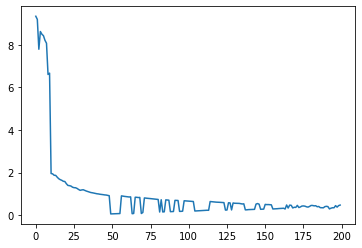

In [ ]:
# display unsorted eigen value
import matplotlib.pyplot as plt
plt.plot(l)

In [ ]:
# sort eigen value in descent manner
L=np.sort(l)[::-1]
L_index=np.argsort(-l)

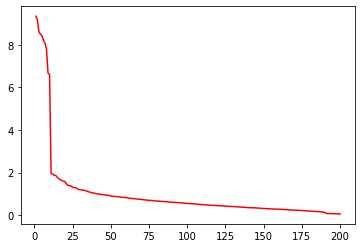

In [ ]:
# display sorted eigen value
k=200
plt.plot(np.arange(1,k+1),L[0:k],label="Descending  Eigen Value of Features",color='r')

In [ ]:
## calculate the PEV(m)
sum=0
pev=[]
for m in L:
  sum+=m
  pev.append(sum/200)
type(pev)
print(pev)

[0.04668243015002, 0.0926305376560472, 0.1357283943985673, 0.17818889454114775, 0.22031260110265025, 0.26134753442352354, 0.3016963890230301, 0.3406378159486633, 0.37396937981982575, 0.4069972633716773, 0.41679037040578315, 0.4264976852025779, 0.4358752162481927, 0.4452286064851312, 0.45416132416189087, 0.4627311439797419, 0.47107707880800886, 0.47926951210067836, 0.4872352601688153, 0.4951451156655864, 0.5025358211105985, 0.5095320192934097, 0.5164739703049023, 0.5233197281206079, 0.529904783846371, 0.536373056312007, 0.5428249426869108, 0.5491119443590303, 0.5551541606312612, 0.561138594025339, 0.5670708414474951, 0.5729183701221298, 0.5787378975133717, 0.5844192069973387, 0.5899794152498327, 0.5954431072076819, 0.6007706358537311, 0.6060419069335375, 0.611227172885877, 0.6163049480775619, 0.6213434013225874, 0.6263395107818904, 0.6312627922611496, 0.6361518978081196, 0.6409830379956284, 0.645755169743981, 0.6504966608255929, 0.6551661216425176, 0.659750803864418, 0.6642967400320627,

Text(0, 0.5, 'PEV(k)')

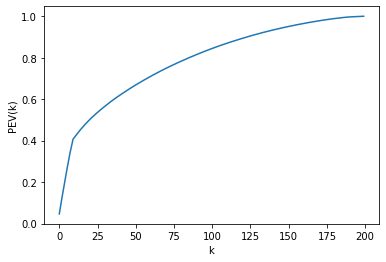

In [ ]:
df_pev=pd.DataFrame(pev)
plt.plot(df_pev)
plt.xlabel('k')
plt.ylabel('PEV(k)')

In [ ]:
## find the smallest r such that PEV(r)>=90%
for r in range(200):
  if L[0:r].sum() > 0.9*L.sum():
    print(r)
    break

124


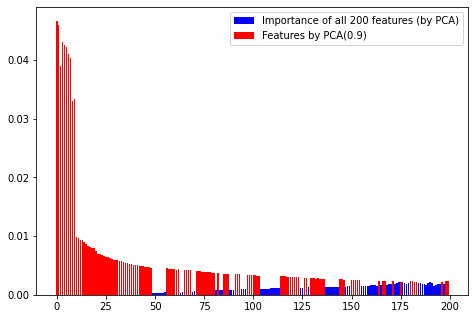

In [ ]:
#highlight (in red) the 90% importance of the 200 features 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(range(0,200),l/l.sum(),label='Importance of all 200 features (by PCA)',color='b')
ax.bar(L_index[0:124],L[0:124]/l.sum(),label='Features by PCA(0.9)',color='r')

ax.legend()
plt.show()

In [ ]:
w_df=pd.DataFrame(w)
W=w[:,L_index[0:124]] # find eigenvectors that corresponding to the largest r eigenvalues
W.shape

(200, 124)

In [ ]:
df_20_ror.iloc[:,0:200]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.497640,-2.014454,0.822348,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-1.610016,-0.588240,2.065633,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,-2.905034,-2.991933,0.474496,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-1.136926,1.321433,1.741277,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,...,-0.698427,-0.491379,2.207590,0.786284,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-1.373708,-0.933841,2.995681,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-2.509651,2.297030,-1.151764,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,-2.283329,1.059976,0.683593,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131
1,-2.014454,0.822348,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,-0.588240,2.065633,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-2.991933,0.474496,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,1.321433,1.741277,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,...,-0.491379,2.207590,0.786284,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,-0.933841,2.995681,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,2.297030,-1.151764,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,3.251112,1.059976,0.683593,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131,2.698313
2,0.822348,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,0.069944,2.065633,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-0.106824,0.474496,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,0.982962,1.741277,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,-0.172195,...,2.207590,0.786284,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,0.602232,2.995681,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,0.095818,-1.151764,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,3.251112,3.248700,0.683593,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131,2.698313,4.396975
3,2.545348,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,0.069944,2.711772,2.308418,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-0.106824,2.502402,2.066116,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,0.982962,4.412719,0.859195,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,-0.172195,1.530836,...,0.786284,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,0.602232,1.825319,1.039332,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,0.095818,1.308231,2.839520,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,0.602223,3.251112,3.248700,0.687384,-1.174865,-1.859020,1.142715,-0.498745,-2.155003,1.320780,-0.447131,2.698313,4.396975,0.667056
4,-1.481078,-1.002217,-0.745229,-0.849976,0.428637,2.048658,-0.334595,0.069944,2.711772,0.789324,-1.102411,-0.135429,-0.886708,-1.368279,-0.960412,0.193945,0.666741,-0.106824,2.502402,0.323428,-1.792950,-1.766784,-1.378891,-2.492401,-5.236914,1.184211,-0.780234,0.982962,4.412719,-2.237415,-1.538878,-0.558194,-1.003374,-1.261605,0.000000,0.294310,-0.243341,-0.172195,1.530836,0.552133,...,-1.362907,-0.343053,0.172117,-0.725470,-1.451925,1.512346,-2.643214,0.602232,1.825319,-1.503474,-0.399174,-0.963391,-0.124517,-1.667445,-1.640254,0.934507,-0.039910,0.095818,1.308231,-1.677163,-1.913741,-1.358954,-0.836455,-1.180902,-3.283796,

In [ ]:
W.shape

(200, 124)

In [ ]:
a=np.array(df_20_ror.iloc[:,0:200]) # need np.array to matmul
Z=np.matmul(a, W) # transform dataset
ZDATA=pd.DataFrame(Z)
ZDATA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
0,11.166172,6.294548,1.809962,-1.790116,-4.495408,6.348145,-3.137585,-5.541315,-2.770599,-7.395231,1.120257,1.861445,-0.964604,-1.550235,3.171027,1.858862,-0.771966,0.521472,-0.594281,-2.349303,-0.879097,3.847502,-2.692972,1.162994,-2.524671,0.792958,1.782950,-1.198772,0.794252,0.631991,0.634212,1.921016,-0.637832,0.191236,-0.155130,-2.370586,0.194550,-2.910427,-1.684733,2.907341,...,1.558182,-1.322603,-1.296803,-1.063371,-2.513942,-0.079950,-3.269628,-1.428290,-0.729168,-0.737902,0.321682,0.095562,1.733101,-2.494038,0.363074,1.970422,-1.258035,0.240985,-0.268144,1.525379,1.232920,-1.911720,-0.134610,-0.039377,1.705394,-0.380069,0.032703,-0.421115,0.977869,-0.183871,1.099780,1.330966,1.834738,1.486486,0.378809,0.356753,-1.273390,-0.300526,-1.103694,2.588213
1,-5.452613,12.104898,4.015530,0.216084,-2.357158,4.829064,5.947966,0.154720,1.568997,-0.627893,3.415980,-1.949918,1.339701,-0.210884,1.767808,2.580002,-0.334321,0.084534,-1.689775,1.828940,-2.807929,2.059996,3.826152,0.719792,-0.840225,2.169729,-0.633983,-2.795746,0.695971,1.380756,0.740381,2.271142,0.086475,0.058377,-1.000262,-2.651759,3.505658,1.100086,-1.198579,-2.602094,...,1.430330,-0.340986,-0.622562,1.155171,0.803289,2.190063,-0.294180,0.006337,0.706034,1.150517,-0.732413,0.598279,2.007511,-0.627921,-0.629409,-0.938104,-2.078414,-1.833146,-2.578712,-1.793349,0.799807,0.833511,-0.416545,-2.111125,0.052202,-0.128976,-2.346908,-0.421924,-0.831845,-1.502533,-0.581853,-0.703684,-0.158961,0.329988,0.565728,0.444089,-0.096981,-0.706699,0.334841,0.610722
2,-4.484338,-5.462726,11.320614,2.213804,-3.723562,-3.092931,5.913583,6.560850,-6.043433,1.311418,0.987836,-4.017295,-0.359883,-1.028514,1.718945,2.682128,-4.568177,3.499262,-3.609223,-1.154638,-2.687571,-3.154028,0.498857,5.715700,-0.369885,0.028222,1.022153,0.888076,0.162108,-1.226452,0.914288,0.783507,1.396724,1.651736,-3.320903,-5.586322,0.420574,-0.983706,-1.739167,0.856037,...,2.245921,0.669846,1.247906,-1.177792,-3.759939,2.534038,-1.380308,-1.475276,0.316782,0.411562,-1.732185,-1.865311,0.090177,3.258392,0.020055,1.558734,-2.674248,-1.420063,-0.250817,1.477058,-0.515826,0.722917,-0.222393,-0.952533,-0.622313,-1.390997,0.069038,-2.622895,-0.591154,-1.135018,1.521491,0.516488,2.977279,2.015000,2.012147,-0.003953,1.142144,1.483191,1.390888,-1.358162
3,10.002168,-0.671968,10.042324,9.150375,1.988048,-8.723410,1.738615,3.613988,2.158346,6.048050,-0.869864,-1.190072,-3.372228,-0.610891,1.183857,5.188774,-2.176761,2.826589,3.843100,0.614778,-2.826334,1.010411,-4.002114,-0.763550,3.082220,-0.488738,-1.214103,-1.169135,1.122131,2.408649,0.760094,0.912809,-3.044608,0.325426,-2.849538,-3.162252,-1.521268,1.018451,-1.637582,-1.734070,...,1.338522,-0.916751,-0.076685,0.023917,-1.791420,1.882229,-0.676195,-1.770787,0.200314,1.376103,2.824203,-2.683609,3.173912,0.249097,1.916494,1.565602,-0.785015,1.550026,-1.654723,-0.557921,0.573239,-0.102524,-0.813394,0.711133,1.185028,0.283764,-0.290709,-0.443080,-0.714830,0.007053,-1.957438,2.597701,2.159051,-0.962708,1.476896,0.449110,-0.454956,3.051407,-0.053445,1.930840
4,-6.278665,7.275969,3.311316,5.164674,10.857638,-7.487445,-4.352539,-3.834439,-0.895885,-0.616799,1.939719,1.054397,-2.345156,2.309152,-0.205200,5.937918,-2.819777,2.352977,-3.248041,3.573936,-2.235344,-1.319995,-0.690504,-4.274568,-1.689914,4.054000,-0.145019,-0.799963,2.171539,-1.531343,-0.884948,0.995818,2.508071,-2.556443,-2.941824,-1.951787,-0.879544,-1.088432,1.742829,-4.712201,...,1.009176,-0.741973,0.554040,-0.822055,-0.374595,-2.243692,2.271495,-2.925239,2.615696,1.101155,-2.832773,-1.727118,-1.103857,-0.645712,-0.156453,0.285114,1.854928,-0.140116,-4.017907,-2.544862,1.416789,-0.201070,0.273624,-2.341852,-1.623923,1.143887,0.526136,0.878026,2.834837,0.615949,

#6. Training and test sets#
6.1 Separately split each class HIGH, LOW into training+testset, in the proportion 85%,15%

In [ ]:
#extract Y from df_20_ror dataframe; 0 is low, 1 is high
Y=np.array(df_20_ror.iloc[:,200]) #np.array is a must, becuase df_20_ror start from row 1 not row 0

In [ ]:
#merge Y to ZDATA
ZDATA['Y']=Y

In [ ]:
ZDATA.shape

(995, 125)

In [ ]:
#separate each class cases, and generate Y; then split train and test data on each CL to ensure both classes are equally splited
#separate each class cases
ZDATA_CLASS0=ZDATA[ZDATA['Y']==0]
ZDATA_CLASS1=ZDATA[ZDATA['Y']==1]
print(ZDATA_CLASS0.shape,ZDATA_CLASS1.shape)

(633, 125) (362, 125)


In [ ]:
#split train and test data on each CL to ensure each class data is equally splited
#Test case percentage is 15%
from sklearn.model_selection import train_test_split
x0_train, x0_test, y0_train, y0_test = train_test_split(ZDATA_CLASS0.iloc[:,0:124], ZDATA_CLASS0.iloc[:,124], test_size=0.15,random_state=5)
x1_train, x1_test, y1_train, y1_test = train_test_split(ZDATA_CLASS1.iloc[:,0:124], ZDATA_CLASS1.iloc[:,124], test_size=0.15,random_state=5)

In [ ]:
print(x0_train.shape,x0_test.shape, y0_train.shape, y0_test.shape)

(538, 124) (95, 124) (538,) (95,)


In [ ]:
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(307, 124) (55, 124) (307,) (55,)


6.2 CLASS0 has 626 cases and CLASS1 has 219, it is 74% Vs 26%, out of the balancing tolerant range. Use SMOTE to rebalance the class1 cases

In [ ]:
# Import SMOTE function
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=0)

In [ ]:
x0_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
563,-0.277652,0.013228,-0.364567,0.171391,2.755861,1.938558,1.088610,0.802845,0.947596,-0.304139,-2.026166,0.388345,-0.066788,0.981622,-0.859660,-0.014418,1.070554,-0.539768,-1.347381,0.590834,0.928934,0.265274,-0.244425,-1.789882,0.046185,1.293833,1.586553,0.352696,0.504634,-0.726850,0.466200,1.456377,-1.746796,0.315790,-1.052143,1.165320,-0.721957,-1.291557,0.385462,-2.425134,...,-2.661450,1.032605,1.469747,0.073047,-0.975254,1.422949,0.736229,-0.840224,0.998920,-0.723541,3.656092,0.766774,0.402747,1.227340,0.968730,-0.094565,-0.415176,0.095180,0.017324,0.152896,-0.344567,1.387557,-0.317964,0.636669,-2.146446,-0.588778,-1.310915,-2.255064,1.750908,0.580093,-0.985665,0.550578,-1.092904,0.432194,0.926377,0.025491,0.133369,-0.657763,0.681851,-1.160621
870,-3.492873,2.637223,3.974576,4.369720,3.126070,-0.952519,0.494779,3.099378,-6.312742,-6.865909,0.319978,0.024773,2.755368,1.444821,2.158828,-1.286264,-4.528999,-7.443225,-1.146289,-0.250202,1.221519,-0.387913,-2.307702,-0.938616,0.600327,1.587868,5.340800,1.730001,2.460228,-1.292679,1.464513,-1.174412,4.406344,-2.077096,2.548023,0.404538,-2.262186,-1.589502,-1.556113,0.635828,...,1.038646,1.422600,1.534999,1.025991,-1.076663,-0.958198,0.606468,-2.109862,1.229614,-0.413547,-1.747836,0.570526,-0.400946,3.252220,-1.097852,-1.047337,-0.628094,-0.478429,0.221964,0.680336,0.387392,-0.390097,0.518875,2.143490,-0.653794,-1.614108,2.309946,-2.147682,-0.162480,0.157471,-1.371808,0.925422,-0.248049,-0.581834,1.122562,1.144363,-0.358866,1.074160,-0.203751,-2.975752
642,-0.505500,-1.275844,2.227163,-0.949136,0.906199,-2.602226,3.090616,-1.686030,1.093384,1.841028,-0.776391,-0.488962,-0.392688,3.628046,2.226652,-3.035373,4.733462,3.765970,-1.253207,0.759942,1.535968,1.208579,-0.245545,-1.195276,-0.938221,-1.463896,3.660451,2.715688,0.458106,-1.414836,-2.474023,-0.295261,1.165059,-3.149182,-1.529502,-0.830598,1.048446,-1.197138,-2.301857,-0.608952,...,-3.727576,0.243081,1.444352,-0.100515,-0.006106,-0.630510,-0.240537,0.193014,-1.355669,2.100947,0.260944,-0.058068,-0.676162,-1.986117,-0.747367,0.446764,0.585913,1.168390,0.524931,2.164289,1.442092,0.207205,-0.086735,-1.277483,-0.050385,0.187676,-1.230719,0.312451,0.276679,2.348023,-0.621023,0.760336,-2.558104,-0.162405,1.880143,0.783226,-1.198574,0.734785,0.515963,-0.035926
459,1.514781,-3.926168,-2.716891,5.407075,4.354722,-4.847562,4.259512,-7.024667,3.775695,-0.285458,-3.155640,5.627789,3.519157,-3.650053,-3.666974,-2.987473,4.037169,-4.523375,-1.505116,-1.520103,1.254621,0.487444,3.606439,-1.656369,-0.251074,-5.151069,-1.043624,0.573114,-2.472667,1.074584,-0.023967,-0.803544,0.224931,0.562202,3.004037,1.305214,0.902701,0.470863,3.364949,0.366000,...,0.312784,1.073162,-0.197945,0.064158,1.128342,0.550115,-0.735107,-0.119879,1.246851,0.342057,0.283323,-2.008637,0.825385,0.545594,-0.272587,1.278224,-0.642097,2.607167,0.754020,-1.403040,0.205374,0.679847,0.662051,0.279359,-0.782313,2.974115,2.856356,0.687712,-0.185488,1.776606,-0.470218,-0.042430,-0.737249,0.244903,-0.178283,1.812257,0.249728,1.393911,-1.474540,-0.064465
454,-1.215068,-2.248145,-1.747628,1.732367,-3.918980,1.930758,4.369315,3.013549,0.298771,-3.156868,-0.200017,2.095023,1.520914,1.474355,-1.444414,-2.890289,-0.025799,0.127950,-0.488874,-0.157466,1.024710,1.162011,-1.556542,-1.722744,0.941556,-0.881746,-1.262853,1.683327,-0.120283,0.004633,-3.822968,-0.957891,-1.191558,0.559997,-1.451783,-0.267711,0.200539,-0.656777,-3.775775,1.245032,...,1.028195,1.212599,0.581319,0.600416,1.044457,-0.674608,1.053813,-0.062947,0.090399,-0.088098,-1.324137,-1.476032,-0.032167,2.356562,-0.845505,0.039206,-0.758454,1.311374,1.543376,0.700428,0.103652,0.392407,-0.302203,0.177250,-0.900953,-2.852963,-0.281633,1.226938,1.976094,-2.145740,1.12318

In [ ]:
x0_test.shape

(95, 124)

In [ ]:
X_train_merge=pd.concat([x0_train,x1_train])
Y_train_merge=pd.concat([y0_train,y1_train])
X_test_merge=pd.concat([x0_test,x1_test])
Y_test_merge=pd.concat([y0_test,y1_test])

In [ ]:
Y_train_merge

563    0
870    0
642    0
459    0
454    0
      ..
193    1
309    1
523    1
589    1
978    1
Name: Y, Length: 845, dtype: int64

In [ ]:
# Perform SMOTE for training set
X_sm_train, Y_sm_train = sm.fit_resample(X_train_merge, Y_train_merge)

print(f'''Shape of X_train before SMOTE: {X_train_merge.shape} Shape of X_train after SMOTE: {X_sm_train.shape}''')

print('\nBalance of positive and negative classes (%):')
Y_sm_train.value_counts(normalize = True) * 100

Shape of X_train before SMOTE: (845, 124) Shape of X_train after SMOTE: (1076, 124)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Y, dtype: float64

In [ ]:
# Perform SMOTE for test set
X_sm_test, Y_sm_test = sm.fit_resample(X_test_merge, Y_test_merge)

print(f'''Shape of X_test before SMOTE: {X_test_merge.shape} Shape of X_test after SMOTE: {X_sm_test.shape}''')

print('\nBalance of positive and negative classes (%):')
Y_sm_test.value_counts(normalize = True) * 100

Shape of X_test before SMOTE: (150, 124) Shape of X_test after SMOTE: (190, 124)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Y, dtype: float64

6.3 Regrouping training set and test set across the two classes.

Now training set is : X_sm_train and Y_sm_train
Test set is : X_sm_test and Y_sm_test

#7. Apply first a linear SVM to classify the training set into HIGH and LOW#
Do this for 10 values of the error wheight coefficients C

Evaluate the accuracies testAcc and trainAcc on the test set for each C

Evaluate the ratio testAcc / trainAcc and the percentage of support vectors %support for each C

Give all these results in a table

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5, C=1))


In [ ]:
X=X_sm_train
y=Y_sm_train
svc2=clf.fit(X, y)
y_sm_train_pred3=svc2.predict(X_sm_train)
y_sm_test_pred3=svc2.predict(X_sm_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
y_sm_test_pred3.shape

(190,)

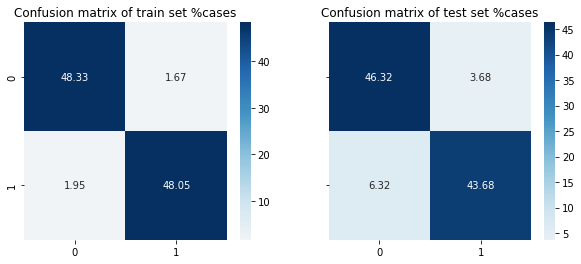

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_svc_linear_train= np.around(confusion_matrix(Y_sm_train,y_sm_train_pred3)/len(Y_sm_train)*100,decimals=2)
cm_svc_linear_test= np.around(confusion_matrix(Y_sm_test,y_sm_test_pred3)/len(Y_sm_test)*100,decimals=2)

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)
fig_sm_linear_train=sns.heatmap(cm_svc_linear_train,annot=True,center= 0, cmap= 'RdBu',fmt='g',ax=axes[0]).set_title('Confusion matrix of train set %cases')
fig_sm_linear_test=sns.heatmap(cm_svc_linear_test,annot=True,center= 0, cmap= 'RdBu',fmt='g',ax=axes[1]).set_title('Confusion matrix of test set %cases')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_linear_SVC_train=np.around(accuracy_score(Y_sm_train, y_sm_train_pred3),decimals=3)
accuracy_linear_SVC_test=np.around(accuracy_score(Y_sm_test, y_sm_test_pred3),decimals=3)
print('accuracy for training data set is:' ,accuracy_linear_SVC_train,
      ';\n accuracy for test data set is: ', accuracy_linear_SVC_test)

accuracy for training data set is: 0.964 ;
 accuracy for test data set is:  0.9


Time the Linear SVC

In [ ]:
%%timeit
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5, C=1))
svc2=clf.fit(X_sm_train, Y_sm_train)
y_sm_train_pred3=svc2.predict(X_sm_train)
y_sm_test_pred3=svc2.predict(X_sm_test)

###Fiting SVC 10 times by c=1 ... 10###

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

y_sm_train_pred_c=pd.DataFrame()
y_sm_test_pred_c=pd.DataFrame()
accuracy_score_SVC_train_c=[0]*10
accuracy_score_SVC_test_c=[0]*10
acc_ratio_SVC_c=[0]*10
#set c in a large range from 1 to 50
#c=np.array((1,3,5,10,15,20,25,30,40,50)) 
c=np.array((0.01,0.02,0.1,0.2,0.5,1,2,5,10,100)) 
supportn=pd.DataFrame()
for i in range (10):
  svc=SVC(C=c[i],kernel='linear',random_state=0) #pipeline doesn't support assign i
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for train data
  y_sm_train_pred_c[i]=make_pipeline(StandardScaler(),svc).fit(X_sm_train, Y_sm_train).predict(X_sm_train)
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for test data
  y_sm_test_pred_c[i]=make_pipeline(StandardScaler(),svc).fit(X_sm_train, Y_sm_train).predict(X_sm_test)
  #record support vector numbers for both class
  supportn[i]=svc.n_support_
  #generate accuray score for train data
  accuracy_score_SVC_train_c[i]=np.around(accuracy_score(Y_sm_train, y_sm_train_pred_c.iloc[:,i]),decimals=3)
  #generate accuray score for test data
  accuracy_score_SVC_test_c[i]=np.around(accuracy_score(Y_sm_test, y_sm_test_pred_c.iloc[:,i]),decimals=3)
  #set  acc_ratio=testAcc/trainAcc
  acc_ratio_SVC_c[i]=np.around(accuracy_score_SVC_test_c[i]/accuracy_score_SVC_train_c[i],decimals=3)
  

In [ ]:
supportn

,0,1,2,3,4,5,6,7,8,9
0,298,247,163,129,111,100,95,86,84,83
1,303,250,159,145,123,107,95,86,74,70


In [ ]:
support_vector_ratio=np.around(supportn.sum()/len(Y_sm_train),decimals=3)
support_vector_ratio

0    0.559
1    0.462
2    0.299
3    0.255
4    0.217
5    0.192
6    0.177
7    0.160
8    0.147
9    0.142
dtype: float64

In [ ]:
acc_ratio_SVC_c

[0.953, 0.92, 0.921, 0.911, 0.907, 0.909, 0.924, 0.897, 0.911, 0.913]

In [ ]:
accuracy_score_SVC_train_c

[0.911, 0.933, 0.954, 0.953, 0.964, 0.967, 0.969, 0.98, 0.976, 0.98]

In [ ]:
accuracy_score_SVC_test_c

[0.868, 0.858, 0.879, 0.868, 0.874, 0.879, 0.895, 0.879, 0.889, 0.895]

In [ ]:
y_sm_test_pred_c

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
185,0,0,0,0,0,0,0,1,0,1
186,1,1,1,1,1,1,1,1,1,1
187,1,1,1,1,1,1,1,1,1,1
188,1,1,1,1,1,1,1,1,1,1


#8. Plot these 4 evaluations versus C#
Interpret results with fairly detailed arguments
Slect 3 best potential values C1, C2, C3 of C
Redefine a new set of 12 values of C centered around C1 C2 C3
Repeat (7) with this new list of 12 values of C and repeat interpreation

In [ ]:
supportn

,0,1,2,3,4,5,6,7,8,9
0,298,247,163,129,111,100,95,86,84,83
1,303,250,159,145,123,107,95,86,74,70


In [ ]:
support_vector_ratio=np.array(supportn.sum()/len(Y_sm_train))
support_vector_ratio

array([0.55855019, 0.46189591, 0.29925651, 0.25464684, 0.21747212,
       0.19237918, 0.17657993, 0.1598513 , 0.14684015, 0.14219331])

In [ ]:
c

array([1.e-02, 2.e-02, 1.e-01, 2.e-01, 5.e-01, 1.e+00, 2.e+00, 5.e+00,
       1.e+01, 1.e+02])

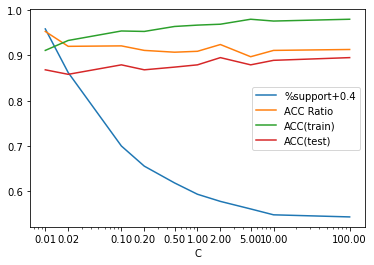

In [ ]:
#support_vector_ratio is smaller than other three variables, to make the plot easier to identify, add 0.4 on support_vector_ratio
#x axis is C which is from 0.01 to 20, show x on log scale.
import matplotlib.pyplot as plt
import matplotlib.ticker
fig, ax = plt.subplots()
support_vector_ratio_scaled=support_vector_ratio+0.4
plt.plot(c,support_vector_ratio_scaled,label="%support+0.4")
plt.plot(c,acc_ratio_SVC_c,label="ACC Ratio")
plt.plot(c,accuracy_score_SVC_train_c,label="ACC(train)")
plt.plot(c,accuracy_score_SVC_test_c,label="ACC(test)")
plt.xlabel('C')
plt.xscale('log')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xticks(c)
plt.legend()
plt.show()

From the plot above, the best range of C would be around 1 to 10, then select new 12 C numbers which are 0.5,1,1.5,2,2.5,3,4,6,8,10,12,14, and compare the result

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

y_sm_train_pred_c_new=pd.DataFrame()
y_sm_test_pred_c_new=pd.DataFrame()
accuracy_score_SVC_train_c_new=[0]*12
accuracy_score_SVC_test_c_new=[0]*12
acc_ratio_SVC_c_new=[0]*12
#set c in a large range from 1 to 50
#c=np.array((1,3,5,10,15,20,25,30,40,50)) 
c_new=np.array((0.5,1,1.5,2,2.5,3,4,6,8,10,12,14)) 
supportn_new=pd.DataFrame()
for i in range (12):
  svc=SVC(C=c_new[i],kernel='linear')
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for train data
  y_sm_train_pred_c_new[i]=make_pipeline(StandardScaler(),svc).fit(X_sm_train, Y_sm_train).predict(X_sm_train)
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for test data
  y_sm_test_pred_c_new[i]=make_pipeline(StandardScaler(),svc).fit(X_sm_train, Y_sm_train).predict(X_sm_test)
  #record support vector numbers for both class
  supportn_new[i]=svc.n_support_
  #generate accuray score for train data
  accuracy_score_SVC_train_c_new[i]=np.around(accuracy_score(Y_sm_train, y_sm_train_pred_c_new.iloc[:,i]),decimals=3)
  #generate accuray score for test data
  accuracy_score_SVC_test_c_new[i]=np.around(accuracy_score(Y_sm_test, y_sm_test_pred_c_new.iloc[:,i]),decimals=3)
  #set  acc_ratio=testAcc/trainAcc
  acc_ratio_SVC_c_new[i]=np.around(accuracy_score_SVC_test_c_new[i]/accuracy_score_SVC_train_c_new[i],decimals=3)

In [ ]:
supportn_new

,0,1,2,3,4,5,6,7,8,9,10,11
0,111,100,97,95,92,90,88,84,84,84,83,84
1,123,107,104,95,95,91,89,84,79,74,76,75


In [ ]:
accuracy_score_SVC_train_c_new

[0.964,
 0.967,
 0.967,
 0.969,
 0.974,
 0.978,
 0.98,
 0.98,
 0.979,
 0.976,
 0.977,
 0.976]

In [ ]:
accuracy_score_SVC_test_c_new

[0.874,
 0.879,
 0.895,
 0.895,
 0.889,
 0.874,
 0.884,
 0.868,
 0.889,
 0.889,
 0.889,
 0.889]

In [ ]:
acc_ratio_SVC_c_new

[0.907,
 0.909,
 0.926,
 0.924,
 0.913,
 0.894,
 0.902,
 0.886,
 0.908,
 0.911,
 0.91,
 0.911]

In [ ]:
support_vector_ratio_new=np.around(supportn_new.sum()/len(Y_sm_train),decimals=3)
support_vector_ratio_new

0     0.217
1     0.192
2     0.187
3     0.177
4     0.174
5     0.168
6     0.164
7     0.156
8     0.151
9     0.147
10    0.148
11    0.148
dtype: float64

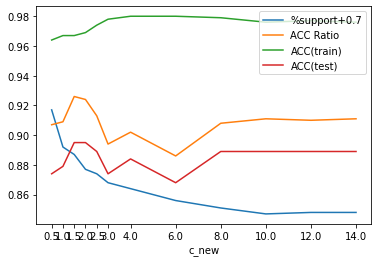

In [ ]:
#support_vector_ratio is smaller than other three variables, to make the plot easier to identify, add 0.4 on support_vector_ratio
#x axis is C which is from 0.01 to 20, show x on log scale.
import matplotlib.pyplot as plt
import matplotlib.ticker
fig, ax = plt.subplots()
support_vector_ratio_new_scaled=support_vector_ratio_new+0.7
plt.plot(c_new,support_vector_ratio_new_scaled,label="%support+0.7")
plt.plot(c_new,acc_ratio_SVC_c_new,label="ACC Ratio")
plt.plot(c_new,accuracy_score_SVC_train_c_new,label="ACC(train)")
plt.plot(c_new,accuracy_score_SVC_test_c_new,label="ACC(test)")
plt.xlabel('c_new')
#plt.xscale('log')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xticks(c_new)
plt.legend(loc='upper right')
plt.show()

When c=1.5, both Acc_ratio and Acc_test have the max value, which are ACC(ratio)=0.895 , ACC(test)=0.967. Selec C=1.5 as the best C for linear SVM

In [ ]:
svc15=SVC(C=1.5,kernel='linear',random_state=0)
y_sm_train_pred_c15=make_pipeline(StandardScaler(),svc15).fit(X_sm_train, Y_sm_train).predict(X_sm_train)
y_sm_test_pred_c15=make_pipeline(StandardScaler(),svc15).fit(X_sm_train, Y_sm_train).predict(X_sm_test)

In [ ]:
 accuracy_score_SVC_train_c15=np.around(accuracy_score(Y_sm_train, y_sm_train_pred_c15),decimals=3)

In [ ]:
 accuracy_score_SVC_test_c15=np.around(accuracy_score(Y_sm_test, y_sm_test_pred_c15),decimals=3)

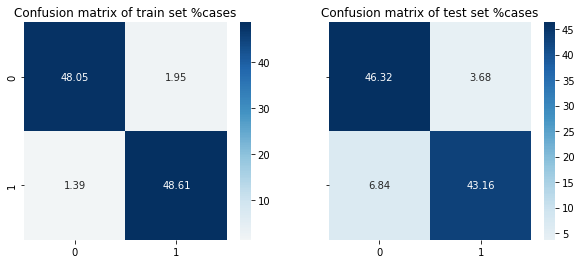

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_svc15_linear_train= np.around(confusion_matrix(Y_sm_train,y_sm_train_pred_c15)/len(Y_sm_train)*100,decimals=2)
cm_svc15_linear_test= np.around(confusion_matrix(Y_sm_test,y_sm_test_pred_c15)/len(Y_sm_test)*100,decimals=2)

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)
fig_sm_linear_train=sns.heatmap(cm_svc15_linear_train,annot=True,center= 0, cmap= 'RdBu',fmt='g',ax=axes[0]).set_title('Confusion matrix of train set %cases')
fig_sm_linear_test=sns.heatmap(cm_svc15_linear_test,annot=True,center= 0, cmap= 'RdBu',fmt='g',ax=axes[1]).set_title('Confusion matrix of test set %cases')

In [ ]:
accuracy_score_SVC_test_c15

0.895

# 9. Apply SVM with a radial kernel to classify the training set into HIGH and LOW
9.1 use hilbert distances as explained in the course to discover a potential range of values for the parameter gamma of the radial kernel; select 4 values of gamma in that range.

9.2 select 10 values of the error wheight coefficients C

9.3 Apply radial SVM for each one of the 10x4 = 40 pairs (C,gamma)
Evaluate the accuracies testAcc and trainAcc for each pair {C, gamma}
Evaluate ratio testAcc / trainAcc and %support vectors for each pair {C,gamma}

9.4 Give all these results in 4 tables of size 10x4
Interpret results to select 5 best potential pairs {C,gamma}
Compare results to best linear SVM found earlier

9.1 use hilbert distances as explained in the course to discover a potential range of values for the parameter gamma of the radial kernel; select 4 values of gamma in that range.

In [ ]:
X_sm_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
0,-0.277652,0.013228,-0.364567,0.171391,2.755861,1.938558,1.088610,0.802845,0.947596,-0.304139,-2.026166,0.388345,-0.066788,0.981622,-0.859660,-0.014418,1.070554,-0.539768,-1.347381,0.590834,0.928934,0.265274,-0.244425,-1.789882,0.046185,1.293833,1.586553,0.352696,0.504634,-0.726850,0.466200,1.456377,-1.746796,0.315790,-1.052143,1.165320,-0.721957,-1.291557,0.385462,-2.425134,...,-2.661450,1.032605,1.469747,0.073047,-0.975254,1.422949,0.736229,-0.840224,0.998920,-0.723541,3.656092,0.766774,0.402747,1.227340,0.968730,-0.094565,-0.415176,0.095180,0.017324,0.152896,-0.344567,1.387557,-0.317964,0.636669,-2.146446,-0.588778,-1.310915,-2.255064,1.750908,0.580093,-0.985665,0.550578,-1.092904,0.432194,0.926377,0.025491,0.133369,-0.657763,0.681851,-1.160621
1,-3.492873,2.637223,3.974576,4.369720,3.126070,-0.952519,0.494779,3.099378,-6.312742,-6.865909,0.319978,0.024773,2.755368,1.444821,2.158828,-1.286264,-4.528999,-7.443225,-1.146289,-0.250202,1.221519,-0.387913,-2.307702,-0.938616,0.600327,1.587868,5.340800,1.730001,2.460228,-1.292679,1.464513,-1.174412,4.406344,-2.077096,2.548023,0.404538,-2.262186,-1.589502,-1.556113,0.635828,...,1.038646,1.422600,1.534999,1.025991,-1.076663,-0.958198,0.606468,-2.109862,1.229614,-0.413547,-1.747836,0.570526,-0.400946,3.252220,-1.097852,-1.047337,-0.628094,-0.478429,0.221964,0.680336,0.387392,-0.390097,0.518875,2.143490,-0.653794,-1.614108,2.309946,-2.147682,-0.162480,0.157471,-1.371808,0.925422,-0.248049,-0.581834,1.122562,1.144363,-0.358866,1.074160,-0.203751,-2.975752
2,-0.505500,-1.275844,2.227163,-0.949136,0.906199,-2.602226,3.090616,-1.686030,1.093384,1.841028,-0.776391,-0.488962,-0.392688,3.628046,2.226652,-3.035373,4.733462,3.765970,-1.253207,0.759942,1.535968,1.208579,-0.245545,-1.195276,-0.938221,-1.463896,3.660451,2.715688,0.458106,-1.414836,-2.474023,-0.295261,1.165059,-3.149182,-1.529502,-0.830598,1.048446,-1.197138,-2.301857,-0.608952,...,-3.727576,0.243081,1.444352,-0.100515,-0.006106,-0.630510,-0.240537,0.193014,-1.355669,2.100947,0.260944,-0.058068,-0.676162,-1.986117,-0.747367,0.446764,0.585913,1.168390,0.524931,2.164289,1.442092,0.207205,-0.086735,-1.277483,-0.050385,0.187676,-1.230719,0.312451,0.276679,2.348023,-0.621023,0.760336,-2.558104,-0.162405,1.880143,0.783226,-1.198574,0.734785,0.515963,-0.035926
3,1.514781,-3.926168,-2.716891,5.407075,4.354722,-4.847562,4.259512,-7.024667,3.775695,-0.285458,-3.155640,5.627789,3.519157,-3.650053,-3.666974,-2.987473,4.037169,-4.523375,-1.505116,-1.520103,1.254621,0.487444,3.606439,-1.656369,-0.251074,-5.151069,-1.043624,0.573114,-2.472667,1.074584,-0.023967,-0.803544,0.224931,0.562202,3.004037,1.305214,0.902701,0.470863,3.364949,0.366000,...,0.312784,1.073162,-0.197945,0.064158,1.128342,0.550115,-0.735107,-0.119879,1.246851,0.342057,0.283323,-2.008637,0.825385,0.545594,-0.272587,1.278224,-0.642097,2.607167,0.754020,-1.403040,0.205374,0.679847,0.662051,0.279359,-0.782313,2.974115,2.856356,0.687712,-0.185488,1.776606,-0.470218,-0.042430,-0.737249,0.244903,-0.178283,1.812257,0.249728,1.393911,-1.474540,-0.064465
4,-1.215068,-2.248145,-1.747628,1.732367,-3.918980,1.930758,4.369315,3.013549,0.298771,-3.156868,-0.200017,2.095023,1.520914,1.474355,-1.444414,-2.890289,-0.025799,0.127950,-0.488874,-0.157466,1.024710,1.162011,-1.556542,-1.722744,0.941556,-0.881746,-1.262853,1.683327,-0.120283,0.004633,-3.822968,-0.957891,-1.191558,0.559997,-1.451783,-0.267711,0.200539,-0.656777,-3.775775,1.245032,...,1.028195,1.212599,0.581319,0.600416,1.044457,-0.674608,1.053813,-0.062947,0.090399,-0.088098,-1.324137,-1.476032,-0.032167,2.356562,-0.845505,0.039206,-0.758454,1.311374,1.543376,0.700428,0.103652,0.392407,-0.302203,0.177250,-0.900953,-2.852963,-0.281633,1.226938,1.976094,-2.145740,1.123181,-1.16444

In [ ]:
Y_sm_train_df=pd.DataFrame(Y_sm_train)
#separate CL0 and CL1 of train data
CL_train=pd.concat([X_sm_train,Y_sm_train],axis=1) #merge X and Y
CL0_train=CL_train[CL_train['Y']==0] #separate CL0 by y=0
CL1_train=CL_train[CL_train['Y']==1] #separate CL1 by y=1
CL0_train=CL0_train.drop('Y',axis=1) #drop y column in CL0
CL1_train=CL1_train.drop('Y',axis=1) #drop y column in CL1
print(CL0_train.shape,CL1_train.shape)

(538, 124) (538, 124)


In [ ]:
#remove CL1 row index, otherwise the corr result return NAN
CL0_train_df=pd.DataFrame(np.array(CL0_train))
CL1_train_df=pd.DataFrame(np.array(CL1_train))

In [ ]:
CL0_train_df.iloc[0,:]

0     -0.277652
1      0.013228
2     -0.364567
3      0.171391
4      2.755861
         ...   
119    0.025491
120    0.133369
121   -0.657763
122    0.681851
123   -1.160621
Name: 0, Length: 124, dtype: float64

In [ ]:
from scipy.spatial import distance
distance.euclidean(CL0_train_df.iloc[0,:],CL1_train_df.iloc[0,:])

28.525074952717368

In [ ]:
w, h = len(CL0_train_df), len(CL0_train_df)
#w, h = 3,3
DIST_Mtrx = np.array([[0 for x in range(w)] for y in range(h)] )

In [ ]:
DIST_Mtrx.shape

(538, 538)

In [ ]:
DIST_Mtrx

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
for i in range (0,len(CL0_train_df)):
  for k in range (0,len(CL1_train_df)):
    DIST_Mtrx[k,i]=distance.euclidean(CL0_train_df.loc[i,:],CL1_train_df.loc[k,:])

In [ ]:
DIST_Mtrx

array([[28, 37, 29, ..., 31, 33, 40],
       [27, 36, 29, ..., 31, 34, 35],
       [44, 44, 44, ..., 44, 44, 42],
       ...,
       [19, 23, 24, ..., 23, 28, 27],
       [28, 33, 29, ..., 27, 34, 34],
       [20, 28, 22, ..., 25, 27, 30]])

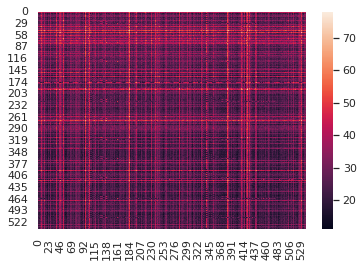

In [ ]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(DIST_Mtrx)

(array([[ 31., 300., 131., ...,   0.,   0.,   0.],
        [  0.,  41., 299., ...,   0.,   0.,   0.],
        [  0., 267., 182., ...,   0.,   0.,   0.],
        ...,
        [  0., 158., 262., ...,   0.,   0.,   0.],
        [  0.,   1., 339., ...,   0.,   0.,   0.],
        [  0.,   2., 286., ...,   0.,   0.,   0.]]),
 array([11. , 17.7, 24.4, 31.1, 37.8, 44.5, 51.2, 57.9, 64.6, 71.3, 78. ]),
 <a list of 538 Lists of Patches objects>)

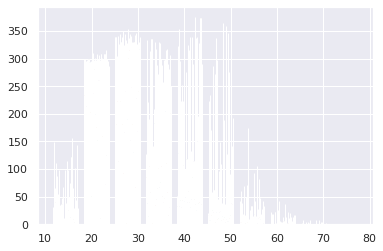

In [ ]:
import matplotlib.pyplot as plt
plt.hist(DIST_Mtrx, bins=10)

In [ ]:
gama_list_o=np.array([0.001,0.005,0.01,0.05,.1,0.5,1])

In [ ]:
gama_list_o[0]

0.001

In [ ]:
kernel_r_0001=np.exp(-0.001*DIST_Mtrx)
Hdistance_r0001=np.sqrt(2-2*kernel_r_0001)
kernel_r_0005=np.exp(-0.005*DIST_Mtrx)
Hdistance_r0005=np.sqrt(2-2*kernel_r_0005)
kernel_r_001=np.exp(-0.01*DIST_Mtrx)
Hdistance_r001=np.sqrt(2-2*kernel_r_001)
kernel_r_005=np.exp(-0.05*DIST_Mtrx)
Hdistance_r005=np.sqrt(2-2*kernel_r_005)
kernel_r_01=np.exp(-0.1*DIST_Mtrx)
Hdistance_r01=np.sqrt(2-2*kernel_r_01)
kernel_r_05=np.exp(-0.5*DIST_Mtrx)
Hdistance_r05=np.sqrt(2-2*kernel_r_05)

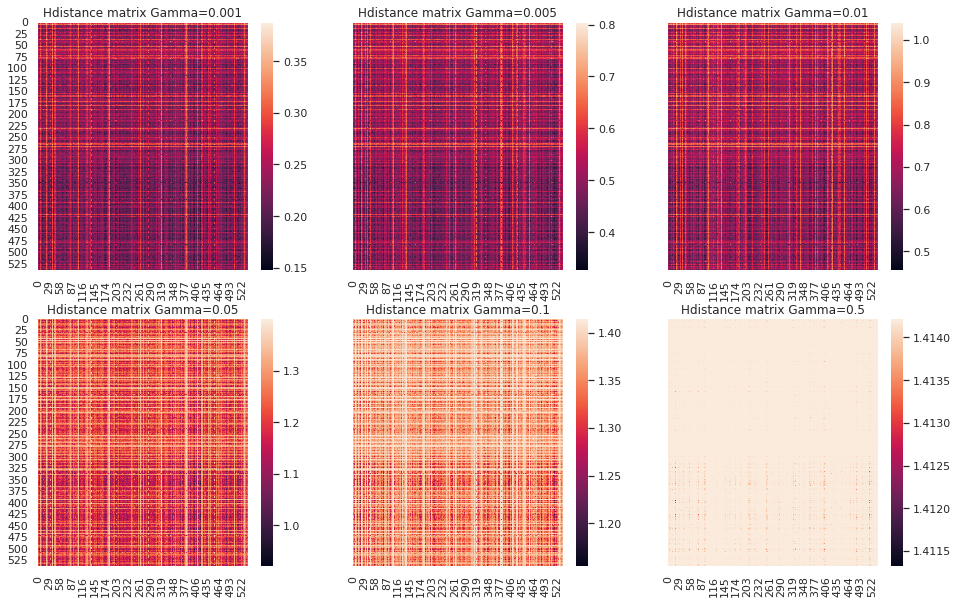

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16,10), sharey=True)
fig1=sns.heatmap(Hdistance_r0001,ax=axes[0][0]).set_title('Hdistance matrix Gamma=0.001')
fig2=sns.heatmap(Hdistance_r0005,ax=axes[0][1]).set_title('Hdistance matrix Gamma=0.005')
fig3=sns.heatmap(Hdistance_r001,ax=axes[0][2]).set_title('Hdistance matrix Gamma=0.01')
fig4=sns.heatmap(Hdistance_r005,ax=axes[1][0]).set_title('Hdistance matrix Gamma=0.05')
fig5=sns.heatmap(Hdistance_r01,ax=axes[1][1]).set_title('Hdistance matrix Gamma=0.1')
fig6=sns.heatmap(Hdistance_r05,ax=axes[1][2]).set_title('Hdistance matrix Gamma=0.5')

As heatmap show above the best 4 values of gama=[0.005,0.01,0.05,0.1]

9.3 select 10 values of the error wheight coefficients C
Answer: as the analysis above in 8, select C=[0.5,1,1.5,2,2.5,3,4,6,8,10]

9.3 Apply radial SVM for each one of the 10x4 = 40 pairs (C,gamma) Evaluate the accuracies testAcc and trainAcc for each pair {C, gamma} Evaluate ratio testAcc / trainAcc and %support vectors for each pair {C,gamma}



In [ ]:
#radial kernel SVM Test
#%%timeit
radial_SVM=SVC(C=1.1,kernel='rbf',gamma=0.1)
y_sm_train_pred_rbf=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_train)

1 loop, best of 5: 343 ms per loop


In [ ]:
gamma_select=np.array([0.0005,0.001,0.005,0.05])
C_select=np.array([0.5,1,1.5,2,2.5,3,4,6,8,10])


In [ ]:
# gamma=.0005
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

y_sm_train_pred_g0005=pd.DataFrame()
y_sm_test_pred_g0005=pd.DataFrame()
accuracy_score_SVC_train_g0005=[0]*10
accuracy_score_SVC_test_g0005=[0]*10
acc_ratio_SVC_g0005=[0]*10
supportn_g0005=pd.DataFrame()
for i in range (0,10):
  radial_SVM=SVC(C=C_select[i],kernel='rbf',gamma=gamma_select[0])
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for train data
  y_sm_train_pred_g0005[i]=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_train)
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for test data
  y_sm_test_pred_g0005[i]=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_test)
  #record support vector numbers for both class
  supportn_g0005[i]=radial_SVM.n_support_
  #generate accuray score for train data
  accuracy_score_SVC_train_g0005[i]=np.around(accuracy_score(Y_sm_train, y_sm_train_pred_g0005.iloc[:,i]),decimals=3)
  #generate accuray score for test data
  accuracy_score_SVC_test_g0005[i]=np.around(accuracy_score(Y_sm_test, y_sm_test_pred_g0005.iloc[:,i]),decimals=3)
  #set  acc_ratio=testAcc/trainAcc
  acc_ratio_SVC_g0005[i]=np.around(accuracy_score_SVC_test_g0005[i]/accuracy_score_SVC_train_g0005[i],decimals=3)

In [ ]:
acc_ratio_SVC_g0005

[0.938, 0.953, 0.987, 0.99, 0.972, 0.981, 0.943, 0.931, 0.931, 0.93]

In [ ]:
accuracy_score_SVC_test_g0005

[0.805, 0.832, 0.868, 0.874, 0.863, 0.879, 0.858, 0.858, 0.863, 0.863]

In [ ]:
# gamma=.001
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

y_sm_train_pred_g001=pd.DataFrame()
y_sm_test_pred_g001=pd.DataFrame()
accuracy_score_SVC_train_g001=[0]*10
accuracy_score_SVC_test_g001=[0]*10
acc_ratio_SVC_g001=[0]*10
supportn_g001=pd.DataFrame()
for i in range (0,10):
  radial_SVM=SVC(C=C_select[i],kernel='rbf',gamma=gamma_select[1])
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for train data
  y_sm_train_pred_g001[i]=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_train)
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for test data
  y_sm_test_pred_g001[i]=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_test)
  #record support vector numbers for both class
  supportn_g001[i]=radial_SVM.n_support_
  #generate accuray score for train data
  accuracy_score_SVC_train_g001[i]=np.around(accuracy_score(Y_sm_train, y_sm_train_pred_g001.iloc[:,i]),decimals=3)
  #generate accuray score for test data
  accuracy_score_SVC_test_g001[i]=np.around(accuracy_score(Y_sm_test, y_sm_test_pred_g001.iloc[:,i]),decimals=3)
  #set  acc_ratio=testAcc/trainAcc
  acc_ratio_SVC_g001[i]=np.around(accuracy_score_SVC_test_g001[i]/accuracy_score_SVC_train_g001[i],decimals=3)

In [ ]:
# gamma=.005
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

y_sm_train_pred_g005=pd.DataFrame()
y_sm_test_pred_g005=pd.DataFrame()
accuracy_score_SVC_train_g005=[0]*10
accuracy_score_SVC_test_g005=[0]*10
acc_ratio_SVC_g005=[0]*10
supportn_g005=pd.DataFrame()
for i in range (0,10):
  radial_SVM=SVC(C=C_select[i],kernel='rbf',gamma=gamma_select[2])
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for train data
  y_sm_train_pred_g005[i]=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_train)
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for test data
  y_sm_test_pred_g005[i]=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_test)
  #record support vector numbers for both class
  supportn_g005[i]=radial_SVM.n_support_
  #generate accuray score for train data
  accuracy_score_SVC_train_g005[i]=np.around(accuracy_score(Y_sm_train, y_sm_train_pred_g005.iloc[:,i]),decimals=3)
  #generate accuray score for test data
  accuracy_score_SVC_test_g005[i]=np.around(accuracy_score(Y_sm_test, y_sm_test_pred_g005.iloc[:,i]),decimals=3)
  #set  acc_ratio=testAcc/trainAcc
  acc_ratio_SVC_g005[i]=np.around(accuracy_score_SVC_test_g005[i]/accuracy_score_SVC_train_g005[i],decimals=3)

In [ ]:
# gamma=.05
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

y_sm_train_pred_g05=pd.DataFrame()
y_sm_test_pred_g05=pd.DataFrame()
accuracy_score_SVC_train_g05=[0]*10
accuracy_score_SVC_test_g05=[0]*10
acc_ratio_SVC_g05=[0]*10 
supportn_g05=pd.DataFrame()
for i in range (0,10):
  radial_SVM=SVC(C=C_select[i],kernel='rbf', gamma=gamma_select[3])
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for train data
  y_sm_train_pred_g05[i]=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_train)
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for test data
  y_sm_test_pred_g05[i]=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_test)
  #record support vector numbers for both class
  supportn_g05[i]=radial_SVM.n_support_
  #generate accuray score for train data
  accuracy_score_SVC_train_g05[i]=np.around(accuracy_score(Y_sm_train, y_sm_train_pred_g05.iloc[:,i]),decimals=3)
  #generate accuray score for test data
  accuracy_score_SVC_test_g05[i]=np.around(accuracy_score(Y_sm_test, y_sm_test_pred_g05.iloc[:,i]),decimals=3)
  #set  acc_ratio=testAcc/trainAcc
  acc_ratio_SVC_g05[i]=np.around(accuracy_score_SVC_test_g05[i]/accuracy_score_SVC_train_g05[i],decimals=3)

In [ ]:
TrainACC_df=pd.DataFrame()
TrainACC_df['g0005']=accuracy_score_SVC_train_g0005
TrainACC_df['g001']=accuracy_score_SVC_train_g001
TrainACC_df['g005']=accuracy_score_SVC_train_g005
TrainACC_df['g05']=accuracy_score_SVC_train_g05

In [ ]:
TestACC_df=pd.DataFrame()
TestACC_df['g0005']=accuracy_score_SVC_test_g0005
TestACC_df['g001']=accuracy_score_SVC_test_g001
TestACC_df['g005']=accuracy_score_SVC_test_g005
TestACC_df['g05']=accuracy_score_SVC_test_g05

In [ ]:
supportn_percnt_df=pd.DataFrame()
supportn_percnt_df['g0005']=supportn_g0005.sum()/len(X_sm_train)*100
supportn_percnt_df['g001']=supportn_g001.sum()/len(X_sm_train)*100
supportn_percnt_df['g005']=supportn_g005.sum()/len(X_sm_train)*100
supportn_percnt_df['g05']=supportn_g05.sum()/len(X_sm_train)*100

9.4 Give all these results in 4 tables of size 10*4

In [ ]:
TrainACC_df

,g0005,g001,g005,g05
0,0.858,0.868,0.941,0.868
1,0.873,0.888,0.974,1.000
2,0.879,0.901,0.991,1.000
3,0.883,0.913,0.997,1.000
4,0.888,0.920,0.998,1.000
5,0.896,0.925,0.999,1.000
6,0.910,0.930,0.999,1.000
7,0.922,0.943,1.000,1.000
8,0.927,0.958,1.000,1.000
9,0.928,0.967,1.000,1.000


In [ ]:
TestACC_df

,g0005,g001,g005,g05
0,0.805,0.811,0.826,0.500
1,0.832,0.863,0.821,0.505
2,0.868,0.874,0.837,0.511
3,0.874,0.847,0.837,0.511
4,0.863,0.853,0.832,0.511
5,0.879,0.847,0.837,0.511
6,0.858,0.858,0.837,0.511
7,0.858,0.863,0.842,0.511
8,0.863,0.879,0.853,0.511
9,0.863,0.858,0.853,0.511


In [ ]:
ACC_RATIO=TestACC_df/TrainACC_df
ACC_RATIO

,g0005,g001,g005,g05
0,0.938228,0.934332,0.877790,0.576037
1,0.953036,0.971847,0.842916,0.505000
2,0.987486,0.970033,0.844601,0.511000
3,0.989807,0.927711,0.839519,0.511000
4,0.971847,0.927174,0.833667,0.511000
5,0.981027,0.915676,0.837838,0.511000
6,0.942857,0.922581,0.837838,0.511000
7,0.930586,0.915164,0.842000,0.511000
8,0.930960,0.917537,0.853000,0.511000
9,0.929957,0.887280,0.853000,0.511000


In [ ]:
supportn_percnt_df

,g0005,g001,g005,g05
0,98.605948,93.773234,83.736059,99.349442
1,92.657993,83.550186,74.256506,97.397770
2,86.895911,77.509294,70.910781,97.026022
3,81.691450,73.513011,68.029740,97.026022
4,78.624535,70.074349,66.171004,97.026022
5,76.394052,67.379182,64.126394,97.026022
6,71.840149,63.104089,63.754647,97.026022
7,64.776952,56.784387,61.710037,97.026022
8,60.501859,52.509294,61.059480,97.026022
9,57.713755,50.092937,60.501859,97.026022


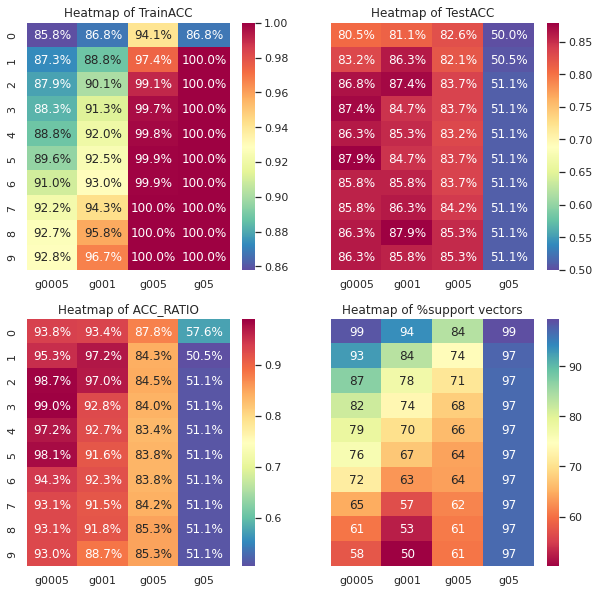

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharey=True)
fig1=sns.heatmap(TrainACC_df,ax=axes[0][0],cmap='Spectral_r',annot=True,fmt=".1%").set_title('Heatmap of TrainACC')
fig2=sns.heatmap(TestACC_df,ax=axes[0][1],cmap='Spectral_r',annot=True,fmt=".1%").set_title('Heatmap of TestACC')
fig4=sns.heatmap(ACC_RATIO,ax=axes[1][0],cmap='Spectral_r',annot=True,fmt=".1%").set_title('Heatmap of ACC_RATIO')
fig3=sns.heatmap(supportn_percnt_df,ax=axes[1][1],cmap='Spectral',annot=True).set_title('Heatmap of %support vectors')

Based on the four heat maps, the five best potential pairs of {C,gamma} are 
: {0.005,0.4},{0.005,0.6},{0.005,0.8},{0.005,1},{0.005,1.3}

#10. Repeat the exploration (9) using new pairs {C,gamma} around each on of 5 the best potential pairs found in (9)

In [ ]:
C_best=np.array([1.5,2,3,8])
gamma_best=np.array([0.0005,0.001])

In [ ]:
# gamma_best=.0005
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

y_sm_train_pred_g0005_C_best=pd.DataFrame()
y_sm_test_pred_g0005_C_best=pd.DataFrame()
accuracy_score_SVC_train_g0005_C_best=[0]*4
accuracy_score_SVC_test_g0005_C_best=[0]*4
acc_ratio_SVC_g0005_C_best=[0]*5
supportn_g0005_C_best=pd.DataFrame()
for i in range (0,4):
  radial_SVM=SVC(C=C_best[i],kernel='rbf',gamma=gamma_best[0],random_state=0)
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for train data
  y_sm_train_pred_g0005_C_best[i]=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_train)
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for test data
  y_sm_test_pred_g0005_C_best[i]=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_test)
  #record support vector numbers for both class
  supportn_g0005_C_best[i]=radial_SVM.n_support_
  #generate accuray score for train data
  accuracy_score_SVC_train_g0005_C_best[i]=np.around(accuracy_score(Y_sm_train, y_sm_train_pred_g0005_C_best.iloc[:,i]),decimals=3)
  #generate accuray score for test data
  accuracy_score_SVC_test_g0005_C_best[i]=np.around(accuracy_score(Y_sm_test, y_sm_test_pred_g0005_C_best.iloc[:,i]),decimals=3)
  #set  acc_ratio=testAcc/trainAcc
  acc_ratio_SVC_g0005_C_best[i]=np.around(accuracy_score_SVC_test_g0005_C_best[i]/accuracy_score_SVC_train_g0005_C_best[i],decimals=3)

In [ ]:
# gamma_best=0.001
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

y_sm_train_pred_g001_C_best=pd.DataFrame()
y_sm_test_pred_g001_C_best=pd.DataFrame()
accuracy_score_SVC_train_g001_C_best=[0]*4
accuracy_score_SVC_test_g001_C_best=[0]*4
acc_ratio_SVC_g001_C_best=[0]*5
supportn_g001_C_best=pd.DataFrame()
for i in range (0,4):
  radial_SVM=SVC(C=C_best[i],kernel='rbf',gamma=gamma_best[1],random_state=0)
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for train data
  y_sm_train_pred_g001_C_best[i]=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_train)
  #apply standardscaler, Linear SVC to fit train data, then predict Y_pred for test data
  y_sm_test_pred_g001_C_best[i]=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_test)
  #record support vector numbers for both class
  supportn_g001_C_best[i]=radial_SVM.n_support_
  #generate accuray score for train data
  accuracy_score_SVC_train_g001_C_best[i]=np.around(accuracy_score(Y_sm_train, y_sm_train_pred_g001_C_best.iloc[:,i]),decimals=3)
  #generate accuray score for test data
  accuracy_score_SVC_test_g001_C_best[i]=np.around(accuracy_score(Y_sm_test, y_sm_test_pred_g001_C_best.iloc[:,i]),decimals=3)
  #set  acc_ratio=testAcc/trainAcc
  acc_ratio_SVC_g001_C_best[i]=np.around(accuracy_score_SVC_test_g001_C_best[i]/accuracy_score_SVC_train_g001_C_best[i],decimals=3)

In [ ]:
acc_ratio_SVC_g001_C_best

[0.97, 0.928, 0.916, 0.918, 0]

In [ ]:
accuracy_score_SVC_test_g0005_C_best

[0.868, 0.874, 0.879, 0.863]

In [ ]:
accuracy_score_SVC_test_g001_C_best

[0.874, 0.847, 0.847, 0.879]

In [ ]:
accuracy_score_SVC_train_g0005_C_best

[0.879, 0.883, 0.896, 0.927]

In [ ]:
accuracy_score_SVC_train_g001_C_best

[0.901, 0.913, 0.925, 0.958]

In [ ]:
acc_ratio_SVC_g0005_C_best

[0.987, 0.99, 0.981, 0.931, 0]

In [ ]:
acc_ratio_SVC_g001_C_best

[0.97, 0.928, 0.916, 0.918, 0]

In [ ]:
supportn_g0005_C_best.sum()/len(X_sm_train)*100

0    86.895911
1    81.691450
2    76.394052
3    60.501859
dtype: float64

In [ ]:
supportn_g001_C_best.sum()/len(X_sm_train)*100

0    77.509294
1    73.513011
2    67.379182
3    52.509294
dtype: float64

#11. Select the best SVM classifier SVM* discovered in 7 8 9#
Compute the confusion matrix of the SVM*; interpret this confusion matrix;
for SVM* compute the percentage of support vectors within class LOW and class HIGH

Answer: the best SVM_star for this dataset is linear SVM when C=1.5

In [ ]:
svc15=SVC(C=1.5,kernel='linear',random_state=0)
y_sm_train_pred_c15=make_pipeline(StandardScaler(),svc15).fit(X_sm_train, Y_sm_train).predict(X_sm_train)
y_sm_test_pred_c15=make_pipeline(StandardScaler(),svc15).fit(X_sm_train, Y_sm_train).predict(X_sm_test)

In [ ]:
 accuracy_score_SVC_train_c15=np.around(accuracy_score(Y_sm_train, y_sm_train_pred_c15),decimals=3)

In [ ]:
 accuracy_score_SVC_test_c15=np.around(accuracy_score(Y_sm_test, y_sm_test_pred_c15),decimals=3)

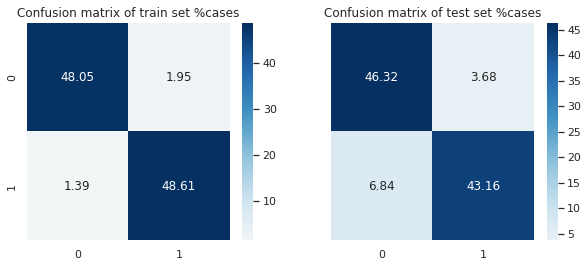

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_svc15_linear_train= np.around(confusion_matrix(Y_sm_train,y_sm_train_pred_c15)/len(Y_sm_train)*100,decimals=2)
cm_svc15_linear_test= np.around(confusion_matrix(Y_sm_test,y_sm_test_pred_c15)/len(Y_sm_test)*100,decimals=2)

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)
fig_sm_linear_train=sns.heatmap(cm_svc15_linear_train,annot=True,center= 0, cmap= 'RdBu',fmt='g',ax=axes[0]).set_title('Confusion matrix of train set %cases')
fig_sm_linear_test=sns.heatmap(cm_svc15_linear_test,annot=True,center= 0, cmap= 'RdBu',fmt='g',ax=axes[1]).set_title('Confusion matrix of test set %cases')

#12. Graphs#
Display separately the graph of S20(t) and the graph of Y20(t)
Display the graph of trueclass(t) with red dots for True_HIGH=1 and blue dots for True_LOW=0
Same for Predicted Class(t)

In [ ]:
# re-structure the vectors as required
result_l=list()
for i in range(11,len(df)+1):
    result_l_c = list()
    for column in range(0, len(df.columns)):
#        result_l_c.append(list(result.iloc[i-10:i, column]))
        result_l_c = result_l_c + list(df.iloc[i-10:i, column])
    result_l.append(result_l_c)
df_20=pd.DataFrame(result_l)

In [ ]:
S20=df_20
S20=S20.drop(S20.index[0])
S20["y"]=Y

In [ ]:
Y20=df_20_ror

In [ ]:
S20_high_true=S20.iloc[:,199]*S20.iloc[:,200]
S20_low_true=S20.iloc[:,199]-S20_high_true
Y20_high_true=Y20.iloc[:,199]*Y20.iloc[:,200]
Y20_low_true=Y20.iloc[:,199]-Y20_high_true

In [ ]:
X_days=np.array([i for i in range (0,len(S20))])

(200.0, 2200.0)

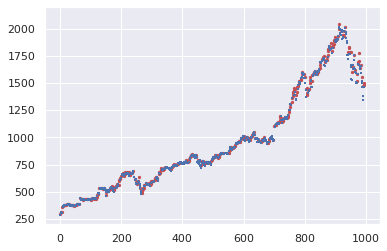

In [ ]:
plt.scatter(X_days,S20_high_true,color='r',marker='o',s=5)
plt.scatter(X_days,S20_low_true,color='b',marker='+',s=5)
plt.ylim(200,2200)

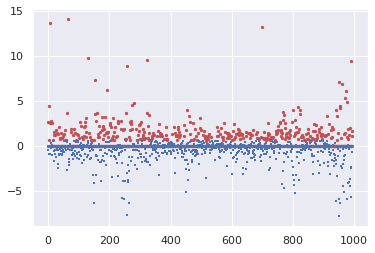

In [ ]:
plt.scatter(X_days,Y20_high,color='r',marker='o',s=5)
plt.scatter(X_days,Y20_low,color='b',marker='+',s=5)

Generate Predict_Y

In [ ]:
ZDATA.iloc[:,0:124]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
0,11.166172,6.294548,1.809962,-1.790116,-4.495408,6.348145,-3.137585,-5.541315,-2.770599,-7.395231,1.120257,1.861445,-0.964604,-1.550235,3.171027,1.858862,-0.771966,0.521472,-0.594281,-2.349303,-0.879097,3.847502,-2.692972,1.162994,-2.524671,0.792958,1.782950,-1.198772,0.794252,0.631991,0.634212,1.921016,-0.637832,0.191236,-0.155130,-2.370586,0.194550,-2.910427,-1.684733,2.907341,...,1.558182,-1.322603,-1.296803,-1.063371,-2.513942,-0.079950,-3.269628,-1.428290,-0.729168,-0.737902,0.321682,0.095562,1.733101,-2.494038,0.363074,1.970422,-1.258035,0.240985,-0.268144,1.525379,1.232920,-1.911720,-0.134610,-0.039377,1.705394,-0.380069,0.032703,-0.421115,0.977869,-0.183871,1.099780,1.330966,1.834738,1.486486,0.378809,0.356753,-1.273390,-0.300526,-1.103694,2.588213
1,-5.452613,12.104898,4.015530,0.216084,-2.357158,4.829064,5.947966,0.154720,1.568997,-0.627893,3.415980,-1.949918,1.339701,-0.210884,1.767808,2.580002,-0.334321,0.084534,-1.689775,1.828940,-2.807929,2.059996,3.826152,0.719792,-0.840225,2.169729,-0.633983,-2.795746,0.695971,1.380756,0.740381,2.271142,0.086475,0.058377,-1.000262,-2.651759,3.505658,1.100086,-1.198579,-2.602094,...,1.430330,-0.340986,-0.622562,1.155171,0.803289,2.190063,-0.294180,0.006337,0.706034,1.150517,-0.732413,0.598279,2.007511,-0.627921,-0.629409,-0.938104,-2.078414,-1.833146,-2.578712,-1.793349,0.799807,0.833511,-0.416545,-2.111125,0.052202,-0.128976,-2.346908,-0.421924,-0.831845,-1.502533,-0.581853,-0.703684,-0.158961,0.329988,0.565728,0.444089,-0.096981,-0.706699,0.334841,0.610722
2,-4.484338,-5.462726,11.320614,2.213804,-3.723562,-3.092931,5.913583,6.560850,-6.043433,1.311418,0.987836,-4.017295,-0.359883,-1.028514,1.718945,2.682128,-4.568177,3.499262,-3.609223,-1.154638,-2.687571,-3.154028,0.498857,5.715700,-0.369885,0.028222,1.022153,0.888076,0.162108,-1.226452,0.914288,0.783507,1.396724,1.651736,-3.320903,-5.586322,0.420574,-0.983706,-1.739167,0.856037,...,2.245921,0.669846,1.247906,-1.177792,-3.759939,2.534038,-1.380308,-1.475276,0.316782,0.411562,-1.732185,-1.865311,0.090177,3.258392,0.020055,1.558734,-2.674248,-1.420063,-0.250817,1.477058,-0.515826,0.722917,-0.222393,-0.952533,-0.622313,-1.390997,0.069038,-2.622895,-0.591154,-1.135018,1.521491,0.516488,2.977279,2.015000,2.012147,-0.003953,1.142144,1.483191,1.390888,-1.358162
3,10.002168,-0.671968,10.042324,9.150375,1.988048,-8.723410,1.738615,3.613988,2.158346,6.048050,-0.869864,-1.190072,-3.372228,-0.610891,1.183857,5.188774,-2.176761,2.826589,3.843100,0.614778,-2.826334,1.010411,-4.002114,-0.763550,3.082220,-0.488738,-1.214103,-1.169135,1.122131,2.408649,0.760094,0.912809,-3.044608,0.325426,-2.849538,-3.162252,-1.521268,1.018451,-1.637582,-1.734070,...,1.338522,-0.916751,-0.076685,0.023917,-1.791420,1.882229,-0.676195,-1.770787,0.200314,1.376103,2.824203,-2.683609,3.173912,0.249097,1.916494,1.565602,-0.785015,1.550026,-1.654723,-0.557921,0.573239,-0.102524,-0.813394,0.711133,1.185028,0.283764,-0.290709,-0.443080,-0.714830,0.007053,-1.957438,2.597701,2.159051,-0.962708,1.476896,0.449110,-0.454956,3.051407,-0.053445,1.930840
4,-6.278665,7.275969,3.311316,5.164674,10.857638,-7.487445,-4.352539,-3.834439,-0.895885,-0.616799,1.939719,1.054397,-2.345156,2.309152,-0.205200,5.937918,-2.819777,2.352977,-3.248041,3.573936,-2.235344,-1.319995,-0.690504,-4.274568,-1.689914,4.054000,-0.145019,-0.799963,2.171539,-1.531343,-0.884948,0.995818,2.508071,-2.556443,-2.941824,-1.951787,-0.879544,-1.088432,1.742829,-4.712201,...,1.009176,-0.741973,0.554040,-0.822055,-0.374595,-2.243692,2.271495,-2.925239,2.615696,1.101155,-2.832773,-1.727118,-1.103857,-0.645712,-0.156453,0.285114,1.854928,-0.140116,-4.017907,-2.544862,1.416789,-0.201070,0.273624,-2.341852,-1.623923,1.143887,0.526136,0.878026,2.834837,0.615949,

In [ ]:
#use best SVC which is linear SVC with C=1.5
svc15=SVC(C=1.5,kernel='linear',random_state=0)
Predict_Y=make_pipeline(StandardScaler(),svc15).fit(X_sm_train, Y_sm_train).predict(ZDATA.iloc[:,0:124])

In [ ]:
 accuracy_score_SVC_Y20=np.around(accuracy_score(Y, Predict_Y),decimals=3)
 accuracy_score_SVC_Y20

0.95

Text(0.5, 1.0, 'Confusion matrix of Predict Y')

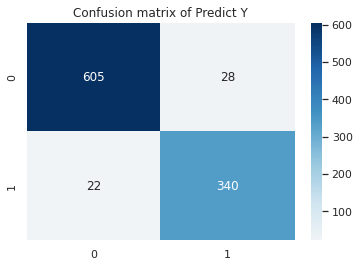

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_svc15_Y20= np.around(confusion_matrix(Y,Predict_Y))
sns.heatmap(cm_svc15_Y20,annot=True,center= 0, cmap= 'RdBu',fmt='g').set_title('Confusion matrix of Predict Y')

In [ ]:
S20_high_pred=S20.iloc[:,199]*Predict_Y
S20_low_pred=S20.iloc[:,199]-S20_high_pred
Y20_high_pred=Y20.iloc[:,199]*Predict_Y
Y20_low_pred=Y20.iloc[:,199]-Y20_high_pred

(200.0, 2200.0)

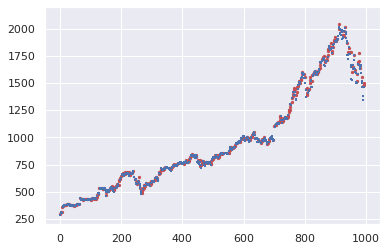

In [ ]:
plt.scatter(X_days,S20_high_pred,color='r',marker='o',s=5)
plt.scatter(X_days,S20_low_pred,color='b',marker='+',s=5)
plt.ylim(200,2200)

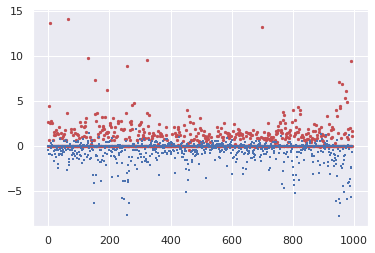

In [ ]:
plt.scatter(X_days,Y20_high_pred,color='r',marker='o',s=5)
plt.scatter(X_days,Y20_low_pred,color='b',marker='+',s=5)

#14. Time it#


Linear SVC

In [ ]:
#C=0.1
%%timeit
y_sm_train_pred_timetest = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5, C=0.1)).fit(X_sm_train, Y_sm_train).predict(X_sm_train)

10 loops, best of 5: 142 ms per loop


In [ ]:
#C=1
%%timeit
y_sm_train_pred_timetest = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5, C=1)).fit(X_sm_train, Y_sm_train).predict(X_sm_train)

In [ ]:
#C=10
%%timeit
y_sm_train_pred_timetest = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5, C=10)).fit(X_sm_train, Y_sm_train).predict(X_sm_train)

In [ ]:
#C=100
%%timeit
y_sm_train_pred_timetest = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5, C=100)).fit(X_sm_train, Y_sm_train).predict(X_sm_train)

Radial SVC

In [ ]:
#radial kernel SVM Test gamma=0.0001
%%timeit
radial_SVM=SVC(C=1,kernel='rbf',gamma=0.0001)
y_sm_train_pred_rbf_timetes=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_train)

1 loop, best of 5: 314 ms per loop


In [ ]:
#radial kernel SVM Test gamma=0.01
%%timeit
radial_SVM=SVC(C=1,kernel='rbf',gamma=0.01)
y_sm_train_pred_rbf_timetes=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_train)

1 loop, best of 5: 278 ms per loop


In [ ]:
#radial kernel SVM Test gamma=1
%%timeit
radial_SVM=SVC(C=1,kernel='rbf',gamma=1)
y_sm_train_pred_rbf_timetest=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_train)

1 loop, best of 5: 336 ms per loop


In [ ]:
#radial kernel SVM Test gamma=10
%%timeit
radial_SVM=SVC(C=1,kernel='rbf',gamma=10)
y_sm_train_pred_rbf_timetes=make_pipeline(StandardScaler(),radial_SVM).fit(X_sm_train, Y_sm_train).predict(X_sm_train)

1 loop, best of 5: 298 ms per loop
